In [50]:
import json

In [60]:
data_files = {
    'atomwise_chkpt.smi': 'Atow-wise',
    'spe_chkpt.json': 'SmilesPE',
    'selfies_chkpt.csv': 'SELFIES',
    'deepsmi_chkpt.csv': 'DeepSMILES',
    'ais_chkpt.smi': 'AIS',
}

In [61]:
def get_rep(sent, l=300):
    cnt = 0
    for i, w in enumerate(sent):
        if w in sent[max(i - l, 0):i]:
            cnt += 1
    return cnt

def repl_l(data_files):
    for checkp, namespace in data_files.items():
        if not checkp.endswith(".csv"):
            with open('./rep-l/{}'.format(checkp), 'r') as f:
                d = json.load(f)
                nonexacts = []
                for t, z1, z2 in d:              
                    if 0.0 < float(t) < 1.0:
                        nonexacts.append([z1.replace(" ", ""), z2.replace(" ", "")])
                
                filterRepl = []
                for i, j in nonexacts:
                    if get_rep(i) + 2 <= get_rep(j):
                        filterRepl.append([i, j])
        else:
            with open('./rep-l/{}'.format(checkp), 'r') as f:
                lines = f.readlines()[1:]
                lines = [line.split(',') for line in lines]
                nonexacts = []
                for *_, z1, z2, t in lines:
                    if 0 <= float(t) < 1.0:
                        if isinstance(z1, int) or isinstance(z2, int) or z1 is None or z2 is None:
                            continue
                        else:
                            nonexacts.append([z1.replace(" ", ""), z2.replace(" ", "")])
                
                filterRepl = []
                for i, j in nonexacts:
                    if get_rep(i) + 2 <= get_rep(j):
                        filterRepl.append([i, j])
        
        # write filterRepl to a file
        with open('./{}_filterRepl.txt'.format(namespace), 'w') as f:
            for i, j in filterRepl:
                f.write("{} {}\n".format(i, j))

In [62]:
repl_l(data_files)

In [63]:
import os
for namespace in data_files.values():
    filepath = '{}_filterRepl.txt'.format(namespace)
    if os.path.exists(filepath):
        with open('{}_filterRepl.txt'.format(namespace)) as f:
            line_count = sum(1 for line in f)

        print('{}_filterRepl.txt haslength: {}'.format(namespace, line_count))
    else:
        print('{} does not exist.'.format(filepath))



Atow-wise_filterRepl.txt haslength: 801
SmilesPE_filterRepl.txt haslength: 821
SELFIES_filterRepl.txt haslength: 886
DeepSMILES_filterRepl.txt haslength: 902
AIS_filterRepl.txt haslength: 727


### Install gnuplot_kernel
___


In [2]:
## if not exist, pls install gnuplot
#conda install -c conda-forge gnuplot

## install gnuplot_kernel
#pip3 install gnuplot_kernel
#python -m gnuplot_kernel install --user

## refresh your notebook.. and change the notebook kernel from python to gnuplot 

## spidey50x.dat and spidey10x.dat source files will generate 10xAug.png and 50xAug.png figures.

In [1]:
set terminal pngcairo enhanced font "Helvetica,24" fontscale 1.0 size 1600, 1200


set title "Performance on GDB-13 variants\n\n\n" 

set spiderplot

#set datafile separator comma

set for [p=1:6] paxis p range [0:100]
set for [p=1:6] paxis p tics format ""

set paxis 1 tics 20 font ",16" format "%g"

set style spiderplot fillstyle transparent solid 0.1 border\
    linewidth 2 pointtype 2 pointsize 1.4

set output '50xAug.png'
set grid spider linetype -1 linecolor "grey" lw 0.5

plot for [i=1:6] "spidey50x.dat" using i title columnhead



Terminal type is now 'pngcairo'
Options are ' background "#ffffff" enhanced font "Helvetica,24" fontscale 1.0 size 1600, 1200 '


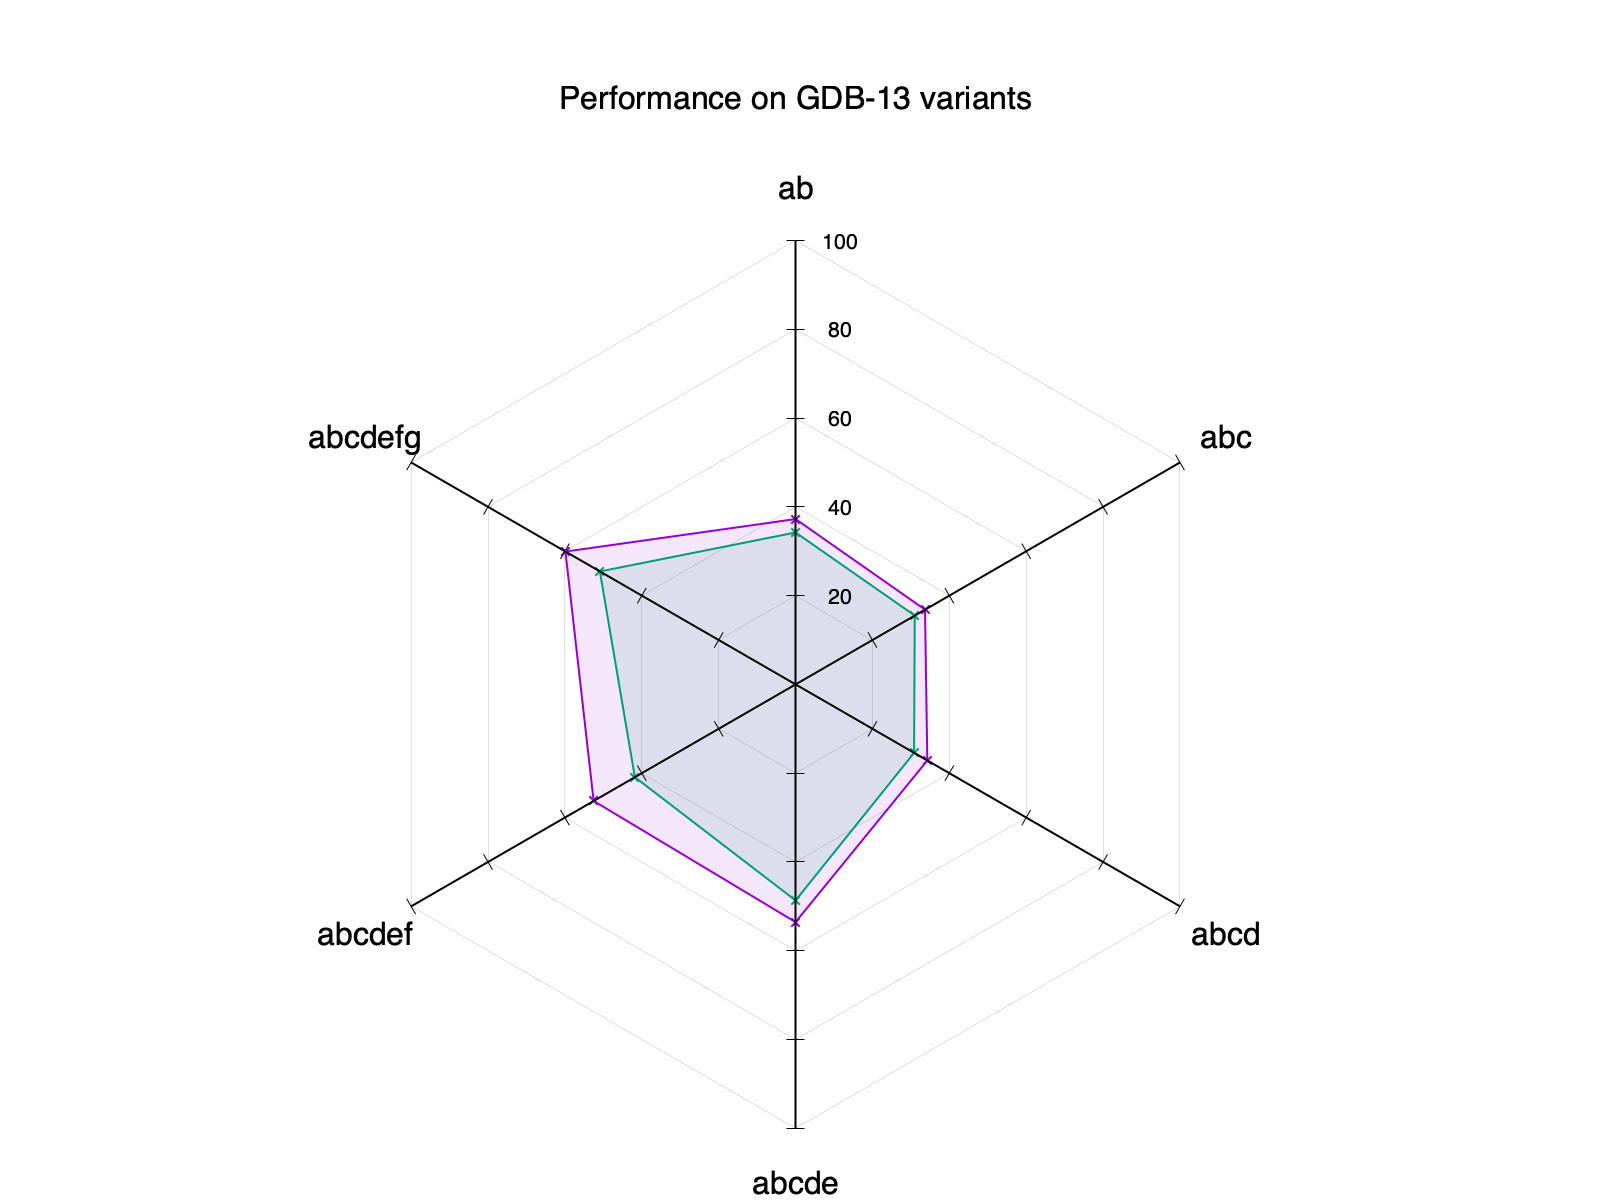

In [4]:
from IPython.display import Image

Image(filename='10xAug.png')


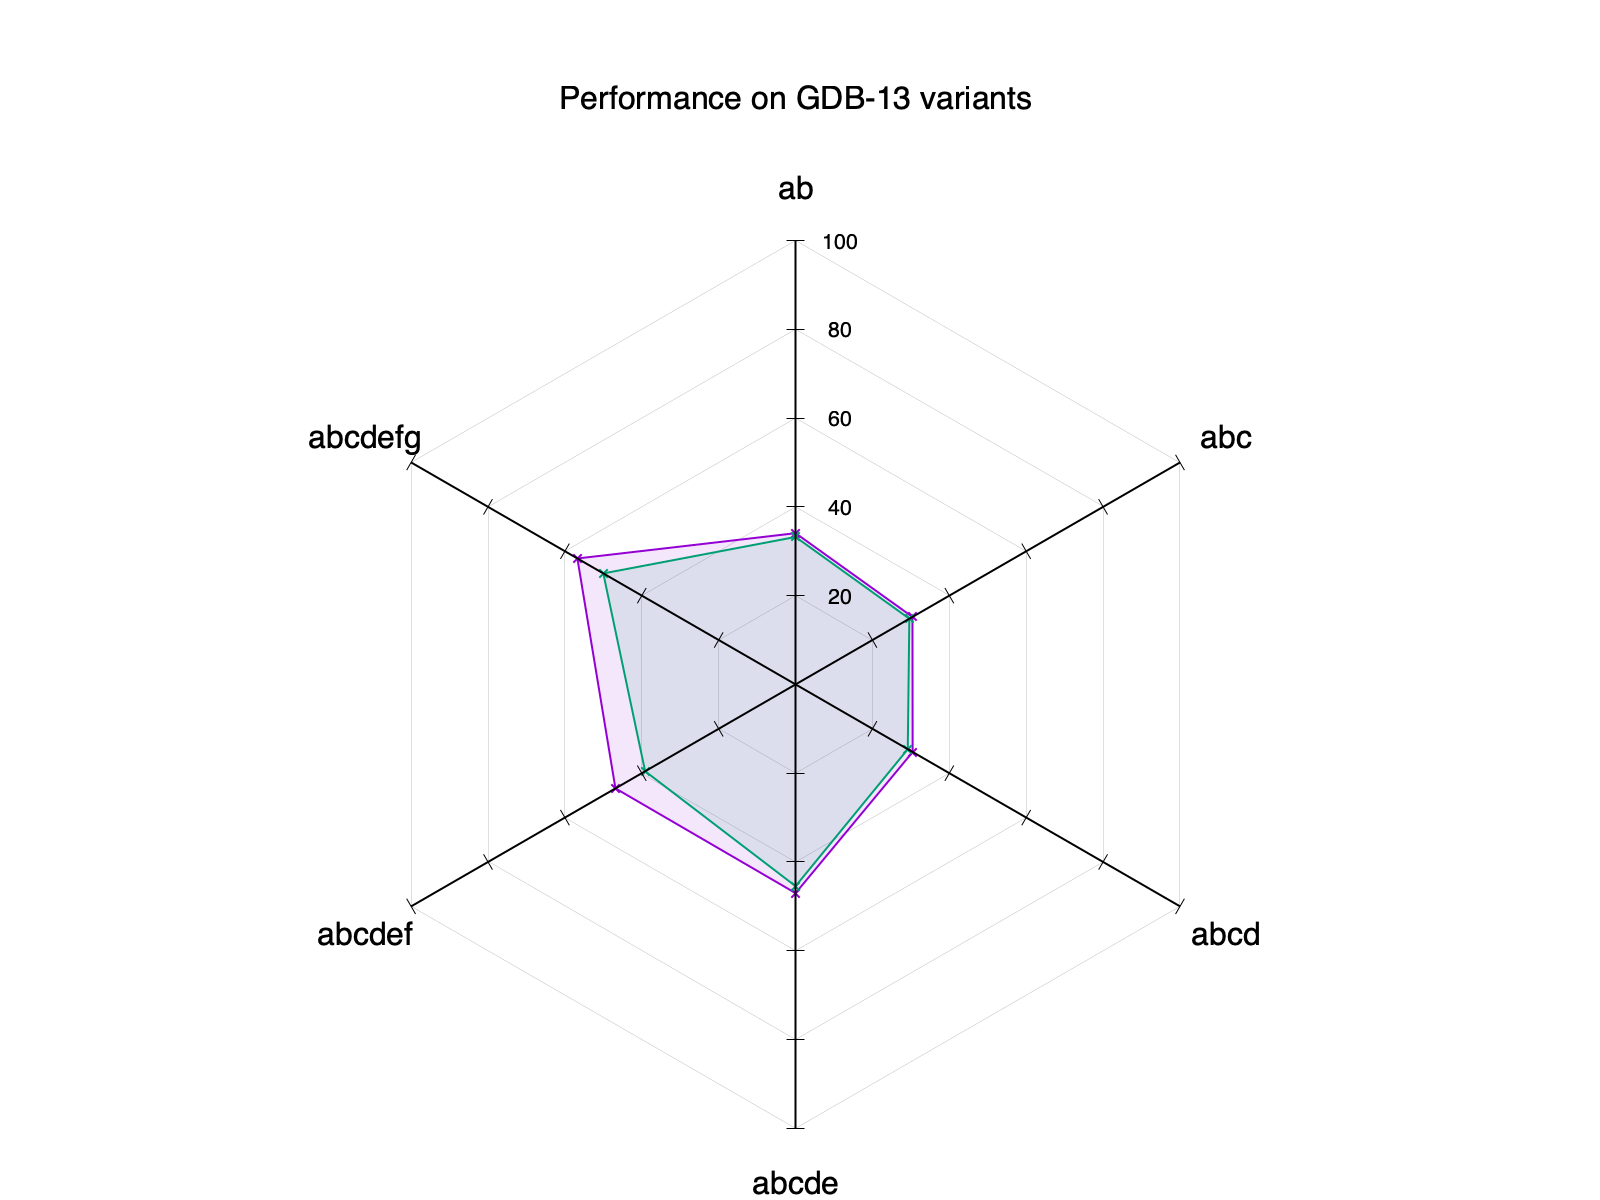

In [3]:
Image(filename='50xAug.png')